#### Assignment 1: An Experimental Study on Treaps


Key components:

1) Data Generator

2) Randomized Treap

3) Competitior

In [101]:
import random
import numpy as np
from graphviz import Digraph, Source


In [94]:
class DataGenerator():
    def __init__(self):
        self.data = []
        self.id_next = 1

    def gen_element(self):
       # sample a uniform random integer key from [0, 10^7]
       key = random.randint(0, 10**7)
       id = self.id_next
       self.id_next += 1
       self.data.append(key)
       return (id, key)
    
    def gen_insertion(self):
        x = self.gen_element()
        return (1,x)
    
    def gen_deletion(self):
        # sample a uniform random integer id from [1, id_next-1]
        id_del = random.randint(1, self.id_next-1)
        # get the key associated with id_del
        key_del = self.data[id_del-1]
        return (2, key_del)

    def gen_search(self):
      # sample a uniform random integer key from [0, 10^7]
       key_sch = random.randint(0, 10**7)
       return (3, key_sch)  


In [95]:
class Node:
    def __init__(self, id, key, priority, parent=None):
        self.id = id
        self.key = key
        self.priority = priority
        self.parent = parent
        self.left = None
        self.right = None
        

class Treap:
    def __init__(self, root=None): 
        self.root = root
        self.size = 0

    def compute_height(self):
        # perform BFS to compute the height of the tree
        if self.root is None:
            return 0
        else:
            height = 0
            queue = [self.root]
            while len(queue) > 0:
                level = []
                for node in queue:
                    if node.left is not None:
                        level.append(node.left)
                    if node.right is not None:
                        level.append(node.right)
                queue = level
                height += 1
            return height


    def insert(self, x):
        id, key = x
        # generate uniform random priority from [0,1]
        priority = random.uniform(0,1)
        #print(f"Inserting key: {key} with priority: {priority}")
        
        if self.root is None:
            self.root = Node(id, key, priority)
        else:
            # traverse the tree to find the correct position for the new node
            current = self.root
            while True:
                #print(f"current: {current.key}, children: {current.left.key if current.left else None}, {current.right.key if current.right else None}")
                if key <= current.key: # left subtree contains all keys less than or equal to the current node's key
                    if current.left is None:
                        new_node = Node(id, key, priority, parent=current)
                        current.left = new_node
                        break
                    current = current.left
                else:
                    if current.right is None:
                        new_node = Node(id, key, priority, parent=current)
                        current.right = new_node
                        break
                    current = current.right
            #visualize_tree(self.root)

            # fix heap property violation
            self.restore_heap_insert(new_node)

        self.size += 1    


    def delete(self, key_del):
        # perform binary search to find the node with the given key
        current = self.root
        while current is not None:
            if key_del == current.key:
                break
            elif key_del < current.key:
                current = current.left
            else:
                current = current.right

        if current is None:
            print(f"Key {key_del} not found!")
        else:
            #print(f"Deleting key: {key}")
            # set the priority of the node to infinity
            current.priority = float('inf')
            # fix heap property violation
            self.restore_heap_delete(current)   
            # remove the node from the tree
            parent = current.parent
            current.parent = None
            if parent is not None:
                if parent.left == current:
                    parent.left = None
                else:
                    parent.right = None

            self.size -= 1        
    
    
    def search(self, q):
        # perform binary search to find the node with the given key
        current = self.root
        while current is not None:
            if q == current.key:
                return (current.id, current.key)
            elif q < current.key:
                current = current.left
            else:
                current = current.right
        return None   


    def restore_heap_insert(self, node):    
        #print(f"Node priority: {node.priority}, parent priority: {node.parent.priority if node.parent else None}")
        # check for min-heap property violation
        while node != self.root and (node.priority < node.parent.priority):
            #print(f"Node {node.key} violates heap property")
            if node == node.parent.left:
                # node is a left child, perform right rotation
                #print(f"Performing right rotation on node {node.parent.key}")
                self.rotate_right(node.parent)
            else:
                # node is a right child, perform left rotation
                #print(f"Performing left rotation on node {node.parent.key}")
                self.rotate_left(node.parent)
            #visualize_tree(self.root)    


    def restore_heap_delete(self, node):    
        #print(f"Node priority: {node.priority}, parent priority: {node.parent.priority if node.parent else None}")
        # perform rotations to bring node down to leaf level
        while node.left is not None or node.right is not None:
            # find child with the smallest priority
            if node.left is not None and node.right is not None:
                if node.left.priority < node.right.priority:
                    # perform right rotation if left child has smaller priority
                    #print(f"Performing right rotation on node {node.key}")
                    self.rotate_right(node)
                else:
                    # perform left rotation otherwise
                    #print(f"Performing left rotation on node {node.key}")
                    self.rotate_left(node)
            elif node.left is not None:
                # perform right rotation if node only has a left child 
                #print(f"Performing right rotation on node {node.key}")
                self.rotate_right(node)
            else:
                # perform left rotation if node only has a right child
                #print(f"Performing left rotation on node {node.key}")
                self.rotate_left(node)


    def rotate_right(self, u):
        """
             u
            /  \
           v    z
          / \ 
         x   y

        Perform right rotation on node

                v
              /   \
             x     u
                  / \ 
                 y   z
        """
        parent = u.parent
        v = u.left
        y = v.right
        # perform right rotation
        v.right = u
        u.parent = v
        u.left = y
        if y is not None:
            y.parent = u
        v.parent = parent
        if parent is not None:
            if parent.left == u:
                parent.left = v
            else:
                parent.right = v
        else:
            self.root = v    


    def rotate_left(self, v):
        """
              v
            /   \
           x     u
                / \ 
               y   z

        Perform right rotation on node

             u
            /  \
           v    z
          / \ 
         x   y
        """
        parent = v.parent
        u = v.right
        y = u.left
        # perform left rotation
        u.left = v
        v.parent = u
        v.right = y
        if y is not None:
            y.parent = v
        u.parent = parent
        if parent is not None:
            if parent.left == v:
                parent.left = u
            else:
                parent.right = u
        else:
            self.root = u            
    

def add_nodes_edges(graph, node, counter=0):
    if node is not None:
        root = str(counter)
        graph.node(root, f"{node.key}, {node.priority:.2f}")
        if node.left is not None:
            left = str(counter + 1)
            graph.edge(root, left)
            counter = add_nodes_edges(graph, node.left, counter + 1)
        else:
            # Add a dummy node if the node has no left child
            left = str(counter + 1)
            graph.node(left, "null")
            graph.edge(root, left)
            counter += 1
        if node.right is not None:
            right = str(counter + 1)
            graph.edge(root, right)
            counter = add_nodes_edges(graph, node.right, counter + 1)
        else:
            # Add a dummy node if the node has no right child
            right = str(counter + 1)
            graph.node(right, "null")
            graph.edge(root, right)
            counter += 1
    return counter

def visualize_tree(root):
    graph = Digraph()
    add_nodes_edges(graph, root)
    src = Source(graph.source)
    display(src)                   

In [ ]:
class Competitor():
    def __init__(self):
        self.A = np.zeros(shape=(2,2), dtype=int) # N x 2 array
        self.n = 0 # current number of elements in the array
        self.N = 2 # current size of the array

    # dynamic array push-back operation
    def push_back(self, x):
        id, key = x
        self.A[self.n,0] = id
        self.A[self.n,1] = key
        self.n += 1
        
        # if the array is full, double its size
        if self.n == self.N:
            self.N *= 2 
            self.A_new = np.zeros(shape=(self.N,2), dtype=int)
            self.A_new[:self.n,:] = self.A
            self.A = self.A_new

    def insert(self, x):
        self.push_back(x)

    def delete(self, key_del):
        # scan the array from beginning to end to find the element with the given key
        for i in range(self.n):
            if key_del == self.A[i,1]:
                # swap the element with the last element in the array
                self.A[i,0] = self.A[self.n-1,0]
                self.A[i,1] = self.A[self.n-1,1]
                # delete the last element of the array
                self.n -= 1

        # shrink the array by half if the number of elements is less than N/4 
        if self.n < self.N // 4:
            self.N //= 2
            self.A_new = np.zeros(shape=(self.N,2), dtype=int)
            self.A_new[:self.n,:] = self.A[:self.n,:]
            self.A = self.A_new      

    def search(self, key_sch):
        # scan the array from beginning to end to find the element with the given key
        for i in range(self.n):
            if key_sch == self.A[i,1]:
                return (self.A[i,0], self.A[i,1])
        return None          
                

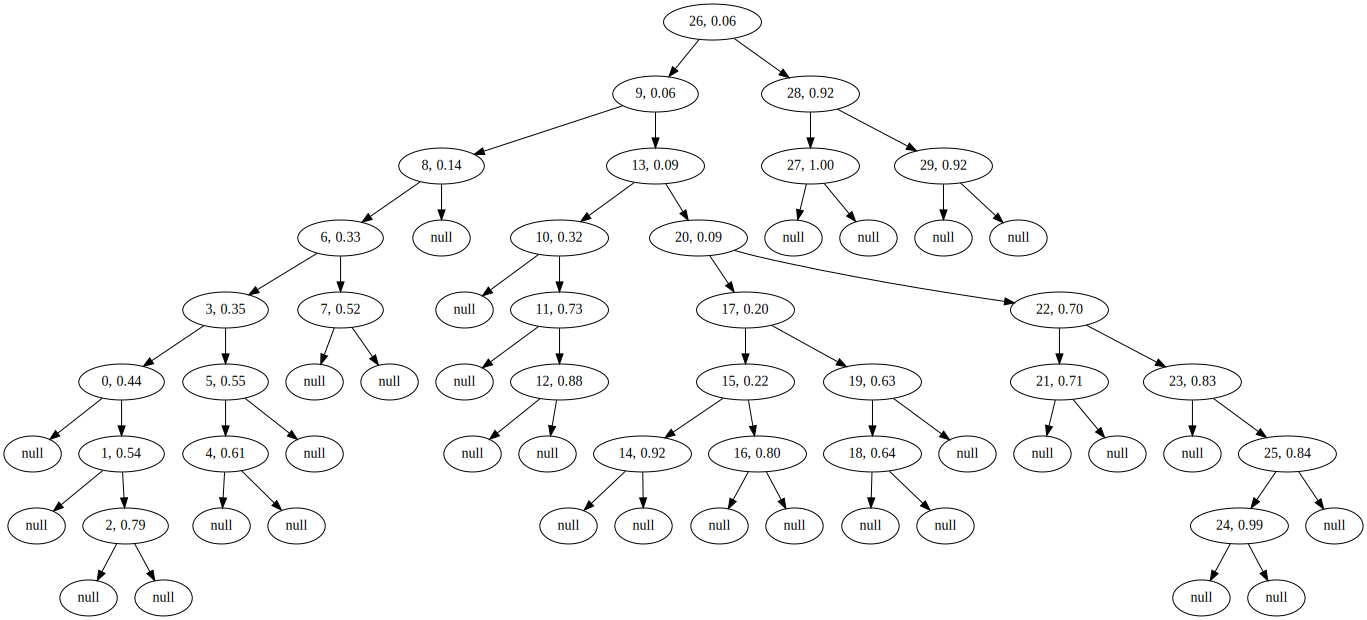

In [96]:
random.seed(0)

# test treap
treap = Treap()
N = 30
keys = list(range(N))
random.shuffle(keys)

for id, key in enumerate(keys):
    treap.insert((id, key))

# visualize the tree
src = visualize_tree(treap.root)

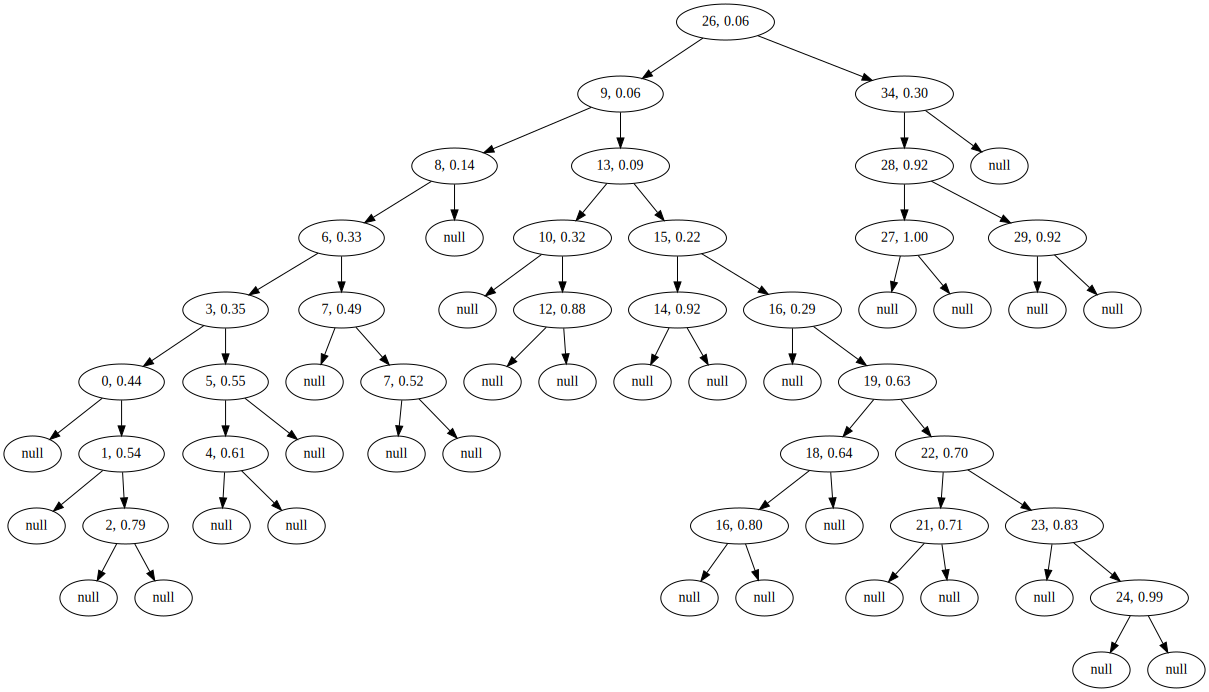

In [97]:
# perform some deletes and inserts
treap.delete(17)
treap.delete(20)
treap.insert((N, 7))
treap.delete(25)
treap.insert((N, 34))
treap.insert((N, 16))
treap.delete(11)

visualize_tree(treap.root)

In [100]:
treap.search(18)

(2, 18)